## Matrices Operations and Linear Regression

## Setup

In [1]:
import numpy as np  # This should be all the dependencies you will need

### 1.1 Matrix Element Wise-multiplication

Consider the two following matrices 

$$
A = \begin{pmatrix}
1&0&0\\
0&1&0\\
0&0&1\\
\end{pmatrix}
$$

and

$$
B = \begin{pmatrix}
1&2&3\\
4&5&6\\
7&8&9\\
\end{pmatrix}
$$

Write a Python program that computes the element-wise multiplication of the two matrices, i.e.

$$
C = \begin{pmatrix}
1&0&0\\
0&5&0\\
0&0&9\\
\end{pmatrix}
$$

In [2]:
# identity matrix aka unit matrix
A = np.identity(3) 
A

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [3]:
A = np.eye(3)
A

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [4]:
B = np.arange(1, 10).reshape(3, -1)
B

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [5]:
# diagonal matrix
C = np.diagflat([1,5,9]) 
C

array([[1, 0, 0],
       [0, 5, 0],
       [0, 0, 9]])

In [6]:
# alternative
C = np.diag(np.diag(B)) 
C

array([[1, 0, 0],
       [0, 5, 0],
       [0, 0, 9]])

In [7]:
C = np.multiply(A, B)
C

array([[1., 0., 0.],
       [0., 5., 0.],
       [0., 0., 9.]])

### 1.2 Matrix-Matrix Multiplication

Consider the following two matrices

$$
A = \begin{pmatrix}
2&1&3\\
1&1&2\\
\end{pmatrix}
$$

and

$$
B = \begin{pmatrix}
1&2\\
5&6\\
7&9\\
\end{pmatrix}
$$

Write a Python program that computes the matrix multiplication of the two matrices, i.e.

$$
C = A \times B = \begin{pmatrix}
28&37\\
20&26\\
\end{pmatrix}
$$
Run the same program for the matrices of Exercise 1.1. Which result do you get?

In [8]:
A = np.array([2,1,3,1,1,2]).reshape(2,-1)
A

array([[2, 1, 3],
       [1, 1, 2]])

In [9]:
B = np.array([1,2,5,6,7,9]).reshape(3,-1)
B

array([[1, 2],
       [5, 6],
       [7, 9]])

In [10]:
C = A.dot(B)
C

array([[28, 37],
       [20, 26]])

### 1.3 Linear Regression

In [11]:
# generate some fake data data
babies = range(10)
months = np.arange(13)
data = [(month, np.dot(month, 24.7) + 96 + np.random.normal(loc=0, scale=20))
        for month in months
        for baby in babies]
month_data = [element[0] for element in data]
weight_data = [element[1] for element in data]
# Let's put the month_data into the matrix X together with the biases column vector
X_1 = np.array(month_data)    # here we put month_data into a row vector called X_1
X_0 = np.ones([X_1.shape[0], 1]) # this is the biases column vector
X_1 = X_1[:, np.newaxis]    # here we convert X_1 from a row vector to a column vector
X = np.concatenate((X_0, X_1), axis=1) # here we concatenate the biases vector to the month_data vector

# Let's put the weight_data into the output vector y
y = np.array(weight_data)

In [12]:
X.ndim, y.ndim

(2, 1)

In [13]:
X.shape, y.shape

((130, 2), (130,))

Given: 
- the two-dimensional array (i.e. a matrix) $X$, containing a column with biases (all set to 1) and a column containing the ages of children (expressed in months)
- a one dimensional column array $y$ containing the weights of the same children expressed in kilograms
Write a function to compute the best fit  using the Linear Regression model with Ordinary Least Squares Method:
$$
\beta = (X^T X)^{-1}X^T y
$$
where, given a matrix $A$, $A^T$ is the transpose matrix of A, and $A^{-1}$ is the inverse matrix of $A$.


The $X$ and $y$ arrays have precomputed for you in the cell above

In [14]:
# Hint: check the NumPy documentation to find the functions to compute the transpose and the inverse of a matrix
def ols(X, y):
    '''returns parameters based on Ordinary Least Squares.'''
    return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

Once you function has been written, you should be able to run the code below:

In [15]:
# find parameters
params = ols(X,y)
print('intercept: {} | slope: {}'.format(params[0], params[1]))

intercept: 93.84721220905612 | slope: 24.999723304997836


You should also be able to visualize the result of the OLS fitting running the code in teh cell below:

Text(0, 0.5, 'Weight (?)')

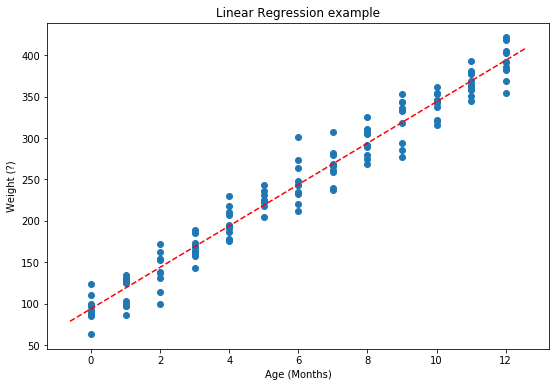

In [16]:
## here we draw a graph of the linear estimator
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 1, figsize=(9, 6))
axes.scatter(month_data, weight_data)
x_vals = np.array(axes.get_xlim())
y_vals = params[0] + params[1] * x_vals
axes.plot(x_vals, y_vals, 'r--')
plt.title('Linear Regression example')
plt.xlabel('Age (Months)')
plt.ylabel('Weight (?)')